# IRIS PREDICTION USING DECISION TREE

# Importing requires libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [215]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis and Visualization

## Exploring and Analysis Data

### Let's see the shape, info and statistical distribution of our loaded datasets.

In [216]:
df.shape

(150, 6)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [218]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [219]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [220]:
# to check the missing value in our datasets.
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### To see distribution of our *target* feature i.e *Species*

In [221]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### There are equal number of tuples for all classes of Species. Thus, our loaded dataset is Balanced Datasets.
### Let's check for the noisy tuples in our datasets.

In [222]:
print(f"Minimum value:\n{df.min()}")

Minimum value:
Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object


In [223]:
print(f"Maximum value:\n{df.max()}")

Maximum value:
Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object


In [224]:
print(f"Average value:\n{df.mean(numeric_only=True)}")

Average value:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64


### Comparing minimum and maximum values with corresponding mean value, there is o huge deviations. Thus, datasets are considered as noise-free.

# Conclusion:
## 1. no missing values in any tuples.
## 2. no noisy values in any tuples.

### Removing Id value from our dataset.
### Here axis=1 means we are dropping the column and inplace-True means we are making that changes to our original dataset df.

In [225]:
df.drop(['Id'], inplace=True, axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualization

## 1. Histograms

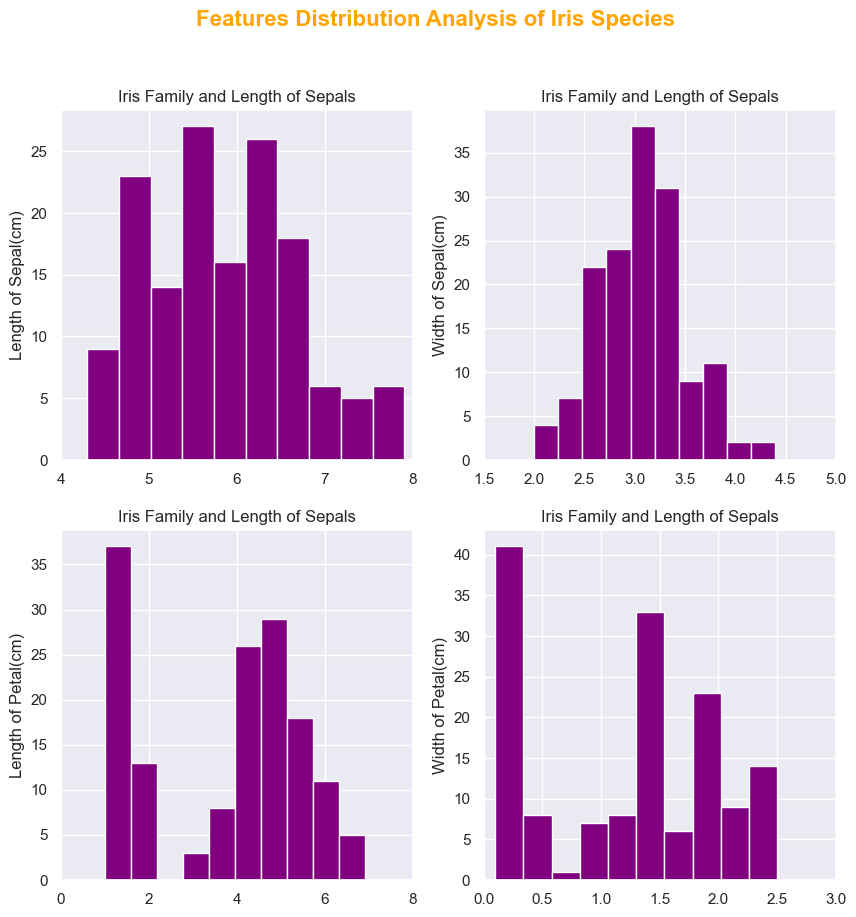

In [226]:
sns.set()
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax0.hist(df["SepalLengthCm"], color="purple")
ax0.set_xlim(4,8)
ax0.set(title="Iris Family and Length of Sepals", ylabel="Length of Sepal(cm)")

ax1.hist(df["SepalWidthCm"], color="purple")
ax1.set_xlim(1.5,5)
ax1.set(title="Iris Family and Length of Sepals", ylabel="Width of Sepal(cm)")

ax2.hist(df["PetalLengthCm"], color="purple")
ax2.set_xlim(0,8)
ax2.set(title="Iris Family and Length of Sepals", ylabel="Length of Petal(cm)")

ax3.hist(df["PetalWidthCm"], color="purple")
ax3.set_xlim(0,3)
ax3.set(title="Iris Family and Length of Sepals", ylabel="Width of Petal(cm)")

# Add a title to figure

fig.suptitle("Features Distribution Analysis of Iris Species", 
            fontsize= 16,
            fontweight = "bold",
            color = "orange");


## 2. Scatter Plot

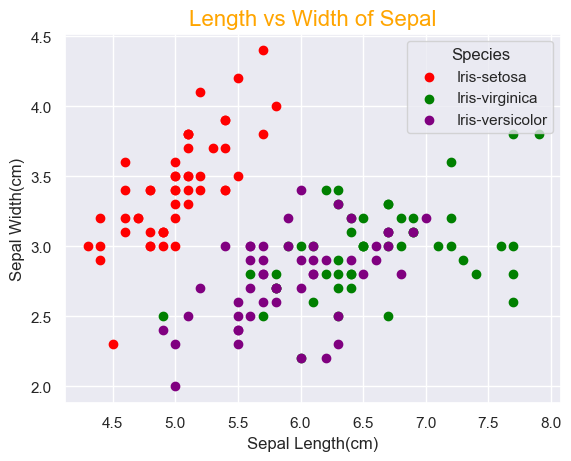

In [227]:
sns.set()
colors = ['red', 'green', 'purple']
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

for i in range(3):
    filter_species = df[df.Species == species[i]]
    plt.scatter(x=filter_species['SepalLengthCm'],
                y=filter_species['SepalWidthCm'],
                c=colors[i],
                label= species[i])
    
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend(title="Species")
plt.title("Length vs Width of Sepal",
          color="orange",
          fontsize=16);

## 3. Correlation Matrix & HeatMap

In [228]:
corr = df.corr(numeric_only=True)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


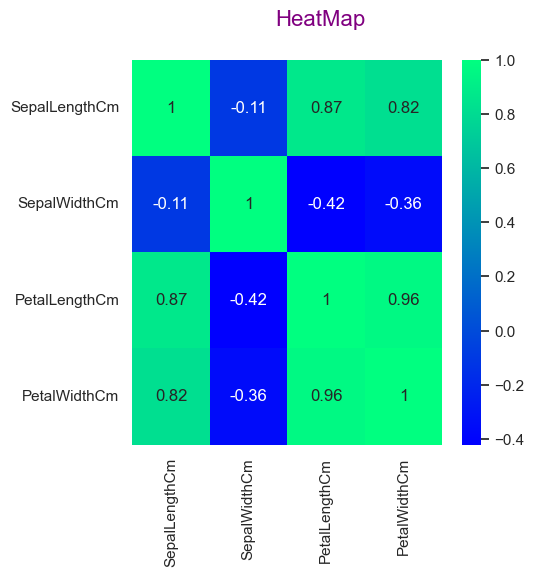

In [229]:
fig, ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap='winter')
fig.suptitle(t="HeatMap",
            color="purple",
            fontsize=16);

## 4. Box-plot

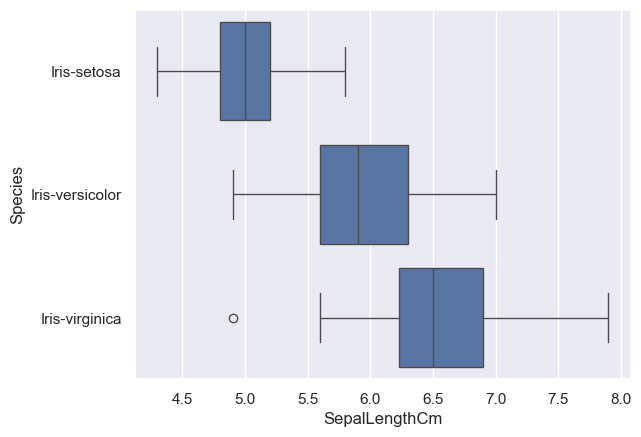

In [230]:
sns.boxplot(x="SepalLengthCm", y="Species", data=df);

## 4. Pairplot

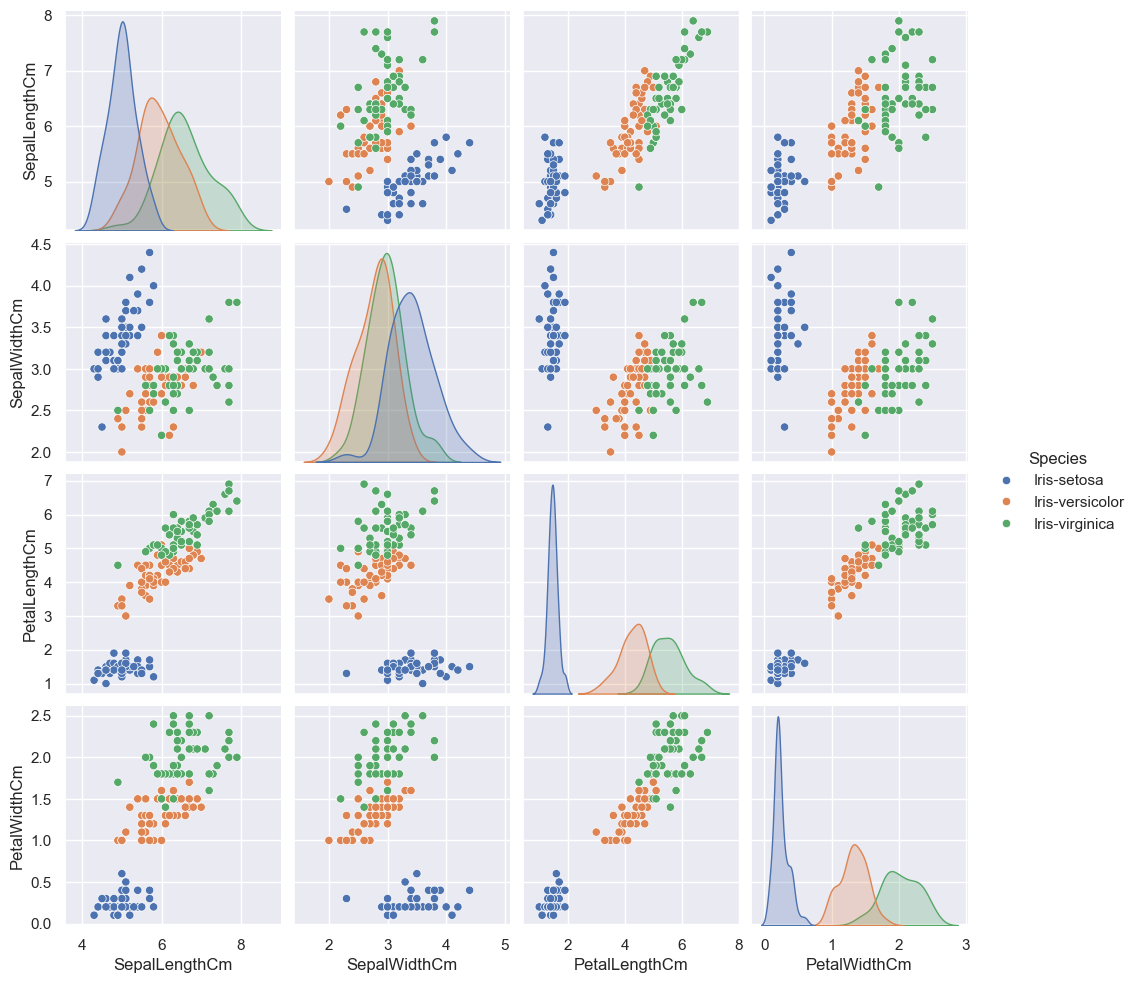

In [231]:
sns.pairplot(data=df, hue="Species");

# Conclusion:
## From the data exloration and analysis, we can say that iris-sertosa species are linearly separable from other two species. 
### Other remaining two species are not linearly separable from each other.

# Data Preprocessing

## Data Splitting

In [232]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [233]:
preds_data1=df.iloc[32] #iris-setos
preds_data1

SepalLengthCm            5.2
SepalWidthCm             4.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 32, dtype: object

In [234]:
#selecting iris-versicolor
preds_data2= df.iloc[76]
preds_data2

SepalLengthCm                6.8
SepalWidthCm                 2.8
PetalLengthCm                4.8
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 76, dtype: object

In [235]:
#iris-virginica
preds_data3= df.iloc[132]
preds_data3

SepalLengthCm               6.4
SepalWidthCm                2.8
PetalLengthCm               5.6
PetalWidthCm                2.2
Species          Iris-virginica
Name: 132, dtype: object

In [236]:
df.shape

(150, 5)

In [237]:
## Removing  tuples with index 32, 76, 132 from our dataset
df.drop([32, 76, 132], inplace=True)
df.shape

(147, 5)

## Making X and Y features

In [238]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [239]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [240]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [241]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [242]:
y.dtypes

dtype('O')

### X has numeric values but y has categorical value which must be encoded into numeric value i.e machine-understandable value.
### LabelEncoder()

In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Encoded Species"] = le.fit_transform(y.ravel()) #Appending to our dataset
y = le.fit_transform(y.ravel())
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### The ravel() function is used to craete a contiguous flattened array. It returns a 1-D array, containing the elements of the input.

In [244]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [245]:
Encoded_class = pd.DataFrame({'Species': ["Iris-sertosa", "Iris-versicolor","Iris-virginica"], 'Encoded':[0,1,2]})
Encoded_class

,Species,Encoded
0,Iris-sertosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


# Preparing Training and Test Data and fitting the model

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(65)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier(criterion="gini", min_samples_split=2)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Model Accuracy on Test Data = {score*100:.2f}%")

Model Accuracy on Test Data = 96.67%


# Model Evaluation
## We use
1. Classification Report  
2.Confusion Matrix  
3.Accuracy 

In [247]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_preds= clf.predict(X_test)
print(f"Classification Report:\n\n{classification_report(y_test, y_preds)}")

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [248]:
cf_matrix= confusion_matrix(y_test, y_preds)
print(f"Confusion Matrix:\n\n{cf_matrix}")

Confusion Matrix:

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


# Confusion Matrix

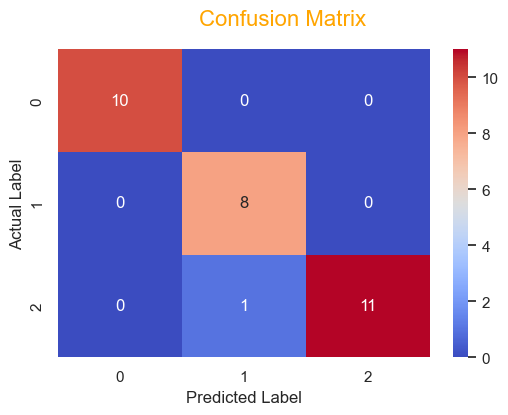

In [249]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
fig.suptitle(t="Confusion Matrix", color="orange", fontsize=16);
ax.set(xlabel="Predicted Label", ylabel="Actual Label");

In [250]:
print(f"Accuracy Score: \n\n{accuracy_score(y_test, y_preds)*100:.2f}%")

Accuracy Score: 

96.67%


# Visualizing our Decision Tree"

In [251]:
from sklearn import tree

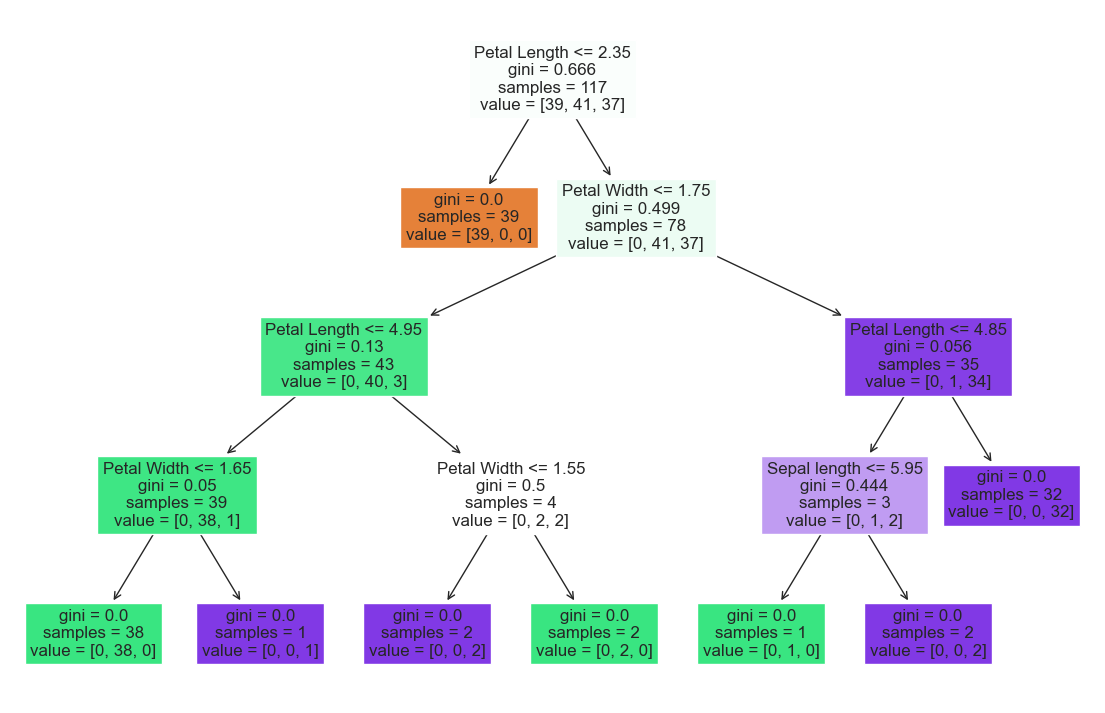

In [252]:
plt.figure(figsize=(14,9))
tree.plot_tree(clf, filled=True, feature_names=['Sepal length', 'Sepal Width', 'Petal Length','Petal Width']);

# Making prediction on Unseen Data

In [253]:
Encoded_class.set_index("Species")

,Encoded
Species,
Iris-sertosa,0
Iris-versicolor,1
Iris-virginica,2


In [254]:
preds_data1

SepalLengthCm            5.2
SepalWidthCm             4.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 32, dtype: object

In [255]:
# Making prediction on data 1 with species = Iris-setosa

pred_x1 = pd.DataFrame(np.array([5.2,4.1,1.5,0.1]).reshape(1,-1), columns=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y1 = clf.predict(pred_x1)
pred_class1 = Encoded_class[Encoded_class["Encoded"]== pred_y1[0]]["Species"].item()
print(f"Predicted class by model on preds_data1 : {pred_class1}")

Predicted class by model on preds_data1 : Iris-sertosa


In [256]:
preds_data2

SepalLengthCm                6.8
SepalWidthCm                 2.8
PetalLengthCm                4.8
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 76, dtype: object

In [257]:
# Making prediction on data 2 with species = Iris-versicolor

pred_x2 = pd.DataFrame(np.array([6.8,2.8,4.8,1.4]).reshape(1,-1),columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y2 = clf.predict(pred_x2)
pred_class2 = Encoded_class[Encoded_class["Encoded"] == pred_y2[0]]["Species"].item()
print(f"Predicted class by model on preds_data1 : {pred_class2}")

Predicted class by model on preds_data1 : Iris-versicolor


In [258]:
preds_data3

SepalLengthCm               6.4
SepalWidthCm                2.8
PetalLengthCm               5.6
PetalWidthCm                2.2
Species          Iris-virginica
Name: 132, dtype: object

In [259]:
#iris-verginica
pred_x3 = pd.DataFrame(np.array([6.4,2.8,5.6,2.2]).reshape(1,-1),columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y3 = clf.predict(pred_x3)
pred_class3 = Encoded_class[Encoded_class["Encoded"] == pred_y3[0]]["Species"].item()
print(f"Predicted class by model on preds_data1 : {pred_class3}")

Predicted class by model on preds_data1 : Iris-virginica


## Awesome!!
### Our model came up with all correct classes of unseen tuples.

# Saving the model and Loading it

In [260]:
import pickle

pickle.dump(clf, open("decision_tree_model.pkl", "wb"))

### dump() saves our trained model into file name decision_tree_model.pkl

In [261]:
loaded_model = pickle.load(open("decision_tree_model.pkl","rb"))
loaded_model.score(X_test, y_test)

0.9666666666666667